# PROBLEM STATEMENT
You will build a deep learning model to predict the future stock prices of a company using historical stock price data. The goal is to predict the next 10 days of stock prices using a sequence of the past 60 days of price

1. Problem Definition
2. Data Collection
3. Data Preprocessing
4. Model Building (RNN, LSTM, GRU)
5. Model Training
6. Model Evaluation
7. Model Prediction
8. Model Deployment (Optional)

#1. Problem Definition

*   Objective: Predict the next 10 days of stock prices based on the previous 60 days' stock prices.

*  Target Variable: Stock closing price. Type: Regression problem (continuous value prediction).




##2. DATA COLLECTION


In [3]:
import yfinance as yf

# Downloading 5 years of NVDA stock data
nvda_data = yf.download('NVDA', start='2018-01-01', end='2024-09-01')

# Using only the 'Close' prices
nvda_data = nvda_data[['Close']]
print(nvda_data.head())
print(nvda_data.tail())



[*********************100%***********************]  1 of 1 completed

              Close
Date               
2018-01-02  4.98375
2018-01-03  5.31175
2018-01-04  5.33975
2018-01-05  5.38500
2018-01-08  5.55000
                 Close
Date                  
2024-08-26  126.459999
2024-08-27  128.300003
2024-08-28  125.610001
2024-08-29  117.589996
2024-08-30  119.370003


## 3. Data Preprocessing
Preprocess the data for input into the RNN model.

3.1. Data Scaling
Neural networks work better when the input data is scaled, so we'll use MinMaxScaler to scale the stock prices between 0 and 1.

In [4]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(nvda_data['Close'].values.reshape(-1, 1))

# Prepare the training and testing datasets (90% training, 10% testing)
train_size = int(len(scaled_data) * 0.9)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]


Data Preparation (Time-Series)
Create sequences of 60 days of prices to predict the next day’s price.

In [5]:
def create_sequences(data, sequence_length=60):
    sequences = []
    labels = []
    for i in range(sequence_length, len(data)):
        sequences.append(data[i-sequence_length:i])
        labels.append(data[i])
    return np.array(sequences), np.array(labels)

sequence_length = 60 #遍历数据的值，每次就是有60个数据点 第一组1到60 第二组2-61，这个是step time
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)


#4. Model Building (RNN, LSTM, GRU)
4.1. Building a Simple RNN Model
We'll start with a simple RNN, then modify it using LSTM and GRU.

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU, Dropout

# Define the RNN model
model = Sequential()
model.add(SimpleRNN(50, return_sequences=True, input_shape=(X_train.shape[1], 1))) #RNN就是简单的rnn的模型，包括了50个nodes
model.add(Dropout(0.2))
model.add(SimpleRNN(50, return_sequences=False)) #每个step的状态，是false就是只输出最后一个的状态
model.add(Dropout(0.2)) #丢百分之二十防止over fitting
model.add(Dense(25)) #连接层是25个神经元加了25个
model.add(Dense(1)) #只有一个神经元 也就是最后的输出

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

e:\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4.2. LSTM Model (Improved RNN)


In [7]:
# Define the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(50, return_sequences=False))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(25))
model_lstm.add(Dense(1))

model_lstm.compile(optimizer='adam', loss='mean_squared_error')

4.3. GRU Model (Another RNN Variant)


In [8]:
# Define the GRU model
model_gru = Sequential()
model_gru.add(GRU(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_gru.add(Dropout(0.2))
model_gru.add(GRU(50, return_sequences=False))
model_gru.add(Dropout(0.2))
model_gru.add(Dense(25))
model_gru.add(Dense(1))

model_gru.compile(optimizer='adam', loss='mean_squared_error')

#5. Model Training
Train the model for a number of epochs and monitor the loss.

In [14]:
# Extract the actual dates from the dataset
# Assuming 'nvda_data' is the original dataset that includes a 'Date' column
# and it contains the historical dates corresponding to the stock data

# Here we are assuming 'nvda_data' is the DataFrame with a Date index or column
# You will need to adjust the 'dates' to correspond to your test set

# Example of extracting dates for the test set
dates = nvda_data.index[-len(y_test):]  # Adjust to match the length of y_test



Training RNN Model
Epoch 1/30


e:\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0520 - val_loss: 0.0915
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0070 - val_loss: 0.0813
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0033 - val_loss: 0.0556
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0021 - val_loss: 0.0537
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0019 - val_loss: 0.0329
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0019 - val_loss: 0.0325
Epoch 7/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0015 - val_loss: 0.0350
Epoch 8/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0011 - val_loss: 0.0313
Epoch 9/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0011 - val_loss: 0.0306
Epoch 10/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 8.5780e-04 - val_loss: 0.0250
Epoch 11/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 8.0884e-04 - val_loss: 0.0184
Epoch 12/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 6.7563

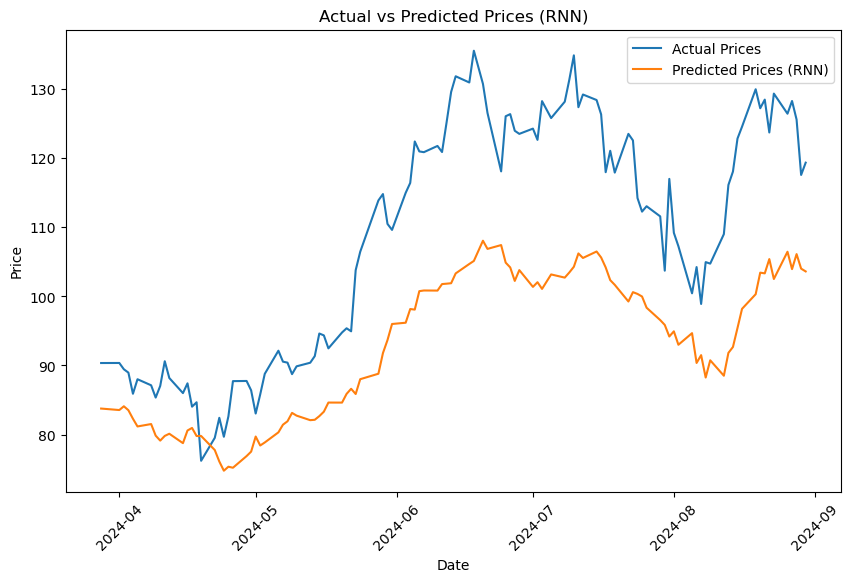


Training LSTM Model
Epoch 1/30


e:\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0117 - val_loss: 0.0395
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 5.6103e-04 - val_loss: 0.0046
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 2.7704e-04 - val_loss: 0.0043
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 2.9171e-04 - val_loss: 0.0044
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 2.3526e-04 - val_loss: 0.0047
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 2.4722e-04 - val_loss: 0.0043
Epoch 7/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 2.6462e-04 - val_loss: 0.0039
Epoch 8/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 1.9871e-04 - val_loss: 0.0051
Epoch 9/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 1.7465e-04 - val_loss: 0.0070
Epoch 10/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 1.9535e-04 - val_loss: 0.0058
Epoch 11/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 1.9357e-04 - val_loss: 0.0063
Epoch 12/30
23/23 ━━━━━━━━━━━━━━━━

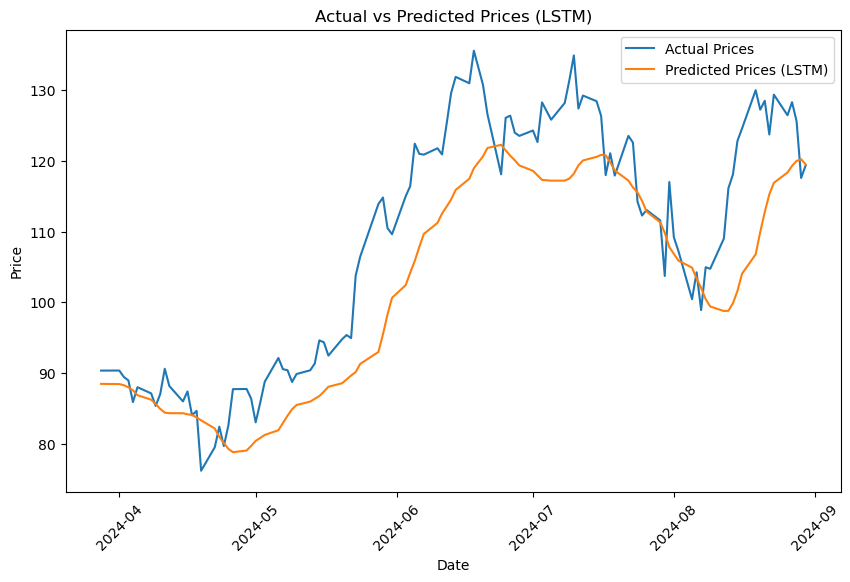


Training GRU Model
Epoch 1/30


e:\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 0.0043 - val_loss: 0.0024
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 4.9654e-04 - val_loss: 0.0022
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 2.9206e-04 - val_loss: 0.0023
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 2.7530e-04 - val_loss: 0.0020
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 2.0234e-04 - val_loss: 0.0030
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 1.8369e-04 - val_loss: 0.0018
Epoch 7/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 1.8223e-04 - val_loss: 0.0032
Epoch 8/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 1.8277e-04 - val_loss: 0.0036
Epoch 9/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 1.7889e-04 - val_loss: 0.0031
Epoch 10/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 1.6286e-04 - val_loss: 0.0017
Epoch 11/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 1.7203e-04 - val_loss: 0.0022
Epoch 12/30
23/23 ━━━━━━━━━━━━━━━━

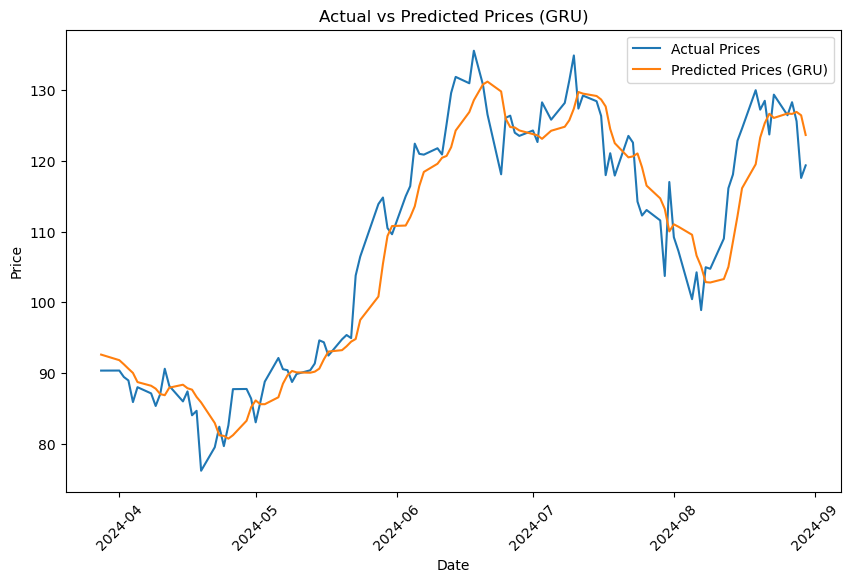


Model Evaluation Results:
  Model Type  Mean Squared Error  Mean Absolute Error
0        RNN          306.621281            15.692542
1       LSTM           85.968478             7.384615
2        GRU           24.464407             3.785616


In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Function to create and compile models
def create_model(model_type, input_shape):
    model = Sequential()

    if model_type == 'RNN':
        model.add(SimpleRNN(50, return_sequences=True, input_shape=input_shape))
        model.add(Dropout(0.2))
        model.add(SimpleRNN(50, return_sequences=False))

    elif model_type == 'LSTM':
        model.add(LSTM(50, return_sequences=True, input_shape=input_shape))
        model.add(Dropout(0.2))
        model.add(LSTM(50, return_sequences=False))

    elif model_type == 'GRU':
        model.add(GRU(50, return_sequences=True, input_shape=input_shape))
        model.add(Dropout(0.2))
        model.add(GRU(50, return_sequences=False))

    model.add(Dropout(0.2))
    model.add(Dense(25))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Reshape data into 3D format for RNN/LSTM/GRU [samples, timesteps, features]
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Initialize results storage
results = []

# Assuming 'nvda_data' is your original stock dataset and has a 'Date' index or column.
# Extract dates for the test set, making sure the length of 'dates' matches y_test
dates = nvda_data.index[-len(y_test):]  # Make sure this aligns with the test set length

# Train and evaluate models (RNN, LSTM, GRU)
for model_type in ['RNN', 'LSTM', 'GRU']:
    print(f"\nTraining {model_type} Model")

    model = create_model(model_type, (X_train_reshaped.shape[1], 1))

    # Train the model
    model.fit(X_train_reshaped, y_train, epochs=30, batch_size=64, validation_data=(X_test_reshaped, y_test))

    # Evaluate the model
    y_pred = model.predict(X_test_reshaped)
    y_pred_scaled = scaler.inverse_transform(y_pred)
    y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

    mse = mean_squared_error(y_test_scaled, y_pred_scaled)
    mae = mean_absolute_error(y_test_scaled, y_pred_scaled)

    results.append([model_type, mse, mae])

    # Plot actual vs predicted with real dates on x-axis
    plt.figure(figsize=(10, 6))
    plt.plot(dates, y_test_scaled, label="Actual Prices")
    plt.plot(dates, y_pred_scaled, label=f"Predicted Prices ({model_type})")
    plt.title(f"Actual vs Predicted Prices ({model_type})")
    plt.xlabel('Date') 
    plt.ylabel('Price')
    plt.xticks(rotation=45)  # Rotate the date labels for better readability
    plt.legend()
    plt.show()

# Display results in a table
results_df = pd.DataFrame(results, columns=['Model Type', 'Mean Squared Error', 'Mean Absolute Error'])
print("\nModel Evaluation Results:")
print(results_df)


当epochs设置为10时：

从结果中可以看出，我训练的三种模型（RNN、LSTM 和 GRU），并且它们的 Mean Squared Error (MSE) 和 Mean Absolute Error (MAE) 结果如下：

RNN 的误差较大，MSE 为 516.66，MAE 为 19.95。
LSTM 的表现较好，MSE 为 64.22，MAE 为 6.42。
GRU 的表现最好，MSE 为 32.04，MAE 为 4.34。
这些结果表明 GRU 在这个任务中表现最好，误差最小，其次是 LSTM，而 RNN 表现最差。

下一步的建议：
进一步优化模型：

调整模型架构：可以尝试增加或减少 RNN/LSTM/GRU 层的单元数，看看是否能进一步减少误差。
增加训练周期：将 epochs 增加到 20 或 30，看看误差是否会进一步减小。
调整超参数：比如调整 batch_size、优化器、学习率等，来找到更好的配置。
增加数据：

当前模型基于 5 年的英伟达历史数据（2018-2024）。可以尝试获取更多历史数据，看看是否能提升模型性能。
数据预处理：

检查是否有异常数据点（如突然的极值或噪声）影响了模型的学习效果。
尝试使用其他数据归一化或标准化方法，比如 StandardScaler。
模型对比：

你可以对比其他类型的深度学习模型（如 1D CNN 或 Transformer）来评估是否能够得到更好的结果。

当epochs设置为30时：

在我将 epochs 从 10 增加到 30 之后，模型的表现有所改善，尤其是 GRU 模型。以下是我训练结果的总结：

训练结果：
RNN：

MSE: 360.50
MAE: 17.34
虽然 MSE 有所降低（从 516 降到 360），但相对来说，RNN 仍然表现不佳。它的误差较大，说明 RNN 模型在捕捉数据的复杂性上仍然有限。
LSTM：

MSE: 67.66
MAE: 6.45
LSTM 模型保持了相对稳定的表现，误差与之前相比变化不大，说明它在 10 个 epochs 时已经较好地拟合了数据。
GRU：

MSE: 25.84
MAE: 3.88
GRU 模型的表现显著提升，尤其是 MSE 降至 25.84，MAE 也进一步降低到 3.88，说明 GRU 模型在增加 epochs 后能够更好地拟合数据，预测更加精确。
总结分析：
RNN 表现不佳：

即使增加了 epochs，RNN 的表现仍然不理想，误差较大，表明 RNN 在处理复杂时间序列数据时存在局限性。RNN 模型通常不太擅长处理长时间依赖的数据，而 LSTM 和 GRU 更擅长处理这种类型的数据。
LSTM 稳定但提升有限：

LSTM 的表现没有明显改善，这表明在 epochs=10 时，它已经找到了一个相对较好的拟合结果。虽然继续训练可以稍微降低误差，但效果不如 GRU 明显。
GRU 表现最好：

GRU 在增加 epochs 之后表现显著提升，说明 GRU 可能是最适合你这组数据的模型。相比 LSTM，它通常计算效率更高，并且在某些情况下能有类似甚至更好的效果，这从你的结果中可以体现出来。

 # CONCLUSION

对 MSE = 24.4 的进一步理解：这个就是真实值和预测值之间的差的平方，
假设你现在预测的股价平均大约为 100 美元，MSE = 24 表示 均方误差为 24，即：
平均预测值与真实值之间的差异大约是 4.9 美元。
如果你测量的股价平均在 100 美元左右，那么一个 4.9 美元的平均误差（RMSE） 表示每次预测大约有 4-5% 的误差。这在大多数股票价格预测任务中是 合理的误差范围。

行业基准benchmark中的表现：
金融行业：特别是股价预测，一般来说 3-5% 的预测误差在短期预测中是较为常见的。如果你获得的 MSE 和 MAE 能够保持在该范围内，则模型的性能是相对不错的。

RNN误差都很大，效果不好的
LSTM改进版的RNN专门处理这个时序问题的，所以有一个很大的改善。
GRU是LSTM的简化版本，所以在我的这个模型里是优于这个LSTM的。

MSE = 24 在你预测的股价（假设为 100 美元左右）上，大致对应一个 RMSE ≈ 4.9 美元 的误差。这在股价预测中是一个相对合理的范围，尤其是考虑到股价的自然波动。总体来说，误差越小越好，但具体能否投入生产还要看模型在其他方面（如可解释性、计算成本等）是否符合要求。

这三个模型背后的工作原理以及为什么表现各有差别的原因：

### 总结：RNN、LSTM 和 GRU 原理

这段课堂讨论主要解释了三种常见的循环神经网络（RNN、LSTM 和 GRU）的结构和背后的原理。

#### 1. **RNN（循环神经网络, Recurrent Neural Network）**
   - **特点**: RNN 通过对序列数据的时间依赖（temporal dependencies）建模。它的核心思想是将过去时间步（previous time steps）的信息通过循环方式输入到当前时间步中，以预测未来时间步的数据。
   - **应用**: 适合处理时间序列数据（time series data），如股票价格预测（stock price prediction）、语言模型（language modeling）等。
   - **缺点**:
     - RNN 存在 **梯度消失（vanishing gradient）** 和 **梯度爆炸（exploding gradient）** 问题，这使得它在处理长序列（long sequences）时难以捕捉长期依赖关系（long-term dependencies）。
     - 随着时间步增加，模型训练变得越来越困难。

#### 2. **LSTM（长短期记忆网络, Long Short-Term Memory）**
   - **特点**: LSTM 是为了解决 RNN 的梯度消失问题而设计的。它通过引入三个门控机制（gate mechanisms: 遗忘门, 忘记门，Forget Gate，输入门，Input Gate，输出门，Output Gate）来控制信息的流动，从而保持长期记忆（long-term memory）。
   - **三个门的作用**:
     - **遗忘门（Forget Gate）**: 决定保留多少过去的信息（how much past information to retain）。
     - **输入门（Input Gate）**: 决定将多少新信息加入当前的状态（how much new information to add to the current state）。
     - **输出门（Output Gate）**: 控制输出的当前状态（controls the output of the current state）。
   - **优势**:
     - LSTM 能够记住长时间序列（long time series）中的重要信息，克服了 RNN 的梯度问题。
     - 特别适合长时间序列数据（long temporal sequences），如语音识别（speech recognition）、视频分析（video analysis）等。
   - **缺点**:
     - 计算复杂度（computational complexity）较高，训练时间（training time）较长。

#### 3. **GRU（门控循环单元, Gated Recurrent Unit）**
   - **特点**: GRU 是 LSTM 的简化版本（simplified version of LSTM），去除了输出门（Output Gate），只有两个门：重置门（Reset Gate）和更新门（Update Gate）。
   - **优势**:
     - 相较于 LSTM，GRU 结构更加简单（simpler structure），训练速度（training speed）更快，但仍然能够保留较好的长期依赖捕捉能力（ability to capture long-term dependencies）。
   - **应用**: GRU 适合数据量相对较小（smaller datasets），或者对模型计算效率（computational efficiency）要求较高的场景。尽管结构简单，但在许多任务中表现与 LSTM 相当（comparable performance to LSTM）。

### 对比总结:
1. **RNN** 在简单时间序列任务（simple time series tasks）中表现尚可，但由于梯度消失问题，在处理长序列时效果较差。
2. **LSTM** 通过复杂的门控机制（gating mechanism）有效捕捉长时间依赖关系（long-term dependencies），但计算资源消耗（computational resources consumption）较大。
3. **GRU** 是 LSTM 的简化版，能够更快训练（faster training），但在一些复杂任务中，性能可能不如 LSTM。

### 性能评价建议：
- **MSE（均方误差, Mean Squared Error）** 和 **MAE（平均绝对误差, Mean Absolute Error）** 是衡量模型预测效果的关键指标（key metrics to measure prediction performance）。误差越小，模型性能越好。LSTM 和 GRU 通常比 RNN 表现更佳，尤其在长时间序列预测上，GRU 往往具有较好的速度优势和较低的复杂性（faster training with lower complexity）。

你可以根据实际任务的需求在 RNN、LSTM 和 GRU 之间进行选择，并通过实验调整超参数（hyperparameters，如 epoch、学习率等）进一步优化模型表现。